<a href="https://colab.research.google.com/github/jsilryan/Deep-Learning-Practice/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

## Data

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0], "X2" : X[:, 1], "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


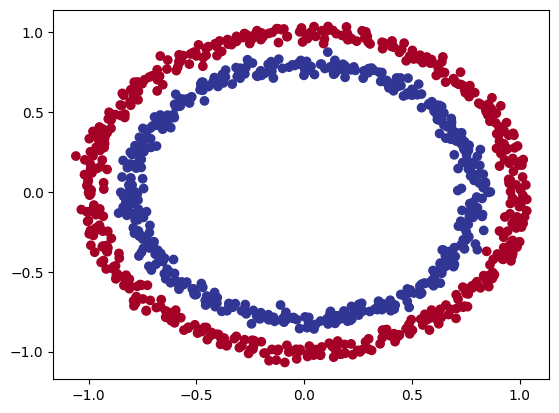

In [7]:
# Toy dataset: A dataset small enough to experiment but still sizeable enough to practice the fundamentals
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

### 1.1 Check input and output shapes

Always convert to tensors

In [9]:
X.shape, y.shape
# X has the features, y is the label

((1000, 2), (1000,))

In [10]:
X_sample = X[0]
y_sample = y[0]
print(f"X value sample : {X_sample}\ny value sample : {y_sample}")
print(f"X value sample shape : {X_sample.shape}\ny value sample shape : {y_sample.shape}")

# y is a scalar hence no shape

X value sample : [0.75424625 0.23148074]
y value sample : 1
X value sample shape : (2,)
y value sample shape : ()


### 1.2 Turn data into tensors and create train and test splits

In [11]:
import torch
torch.__version__

'2.0.1+cu118'

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
X = torch.from_numpy(X).type(torch.float) #Change to default datatype float32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 2. Build a model

Classify red and blue dots
1. Setup device agnostic code so that the code runs on an accelerator (GPU) if it's there.
2. Construct a model by subclassing nn.Module
3. Define a loss function and optimizer
4. Create a train and test loop

In [17]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Creating the model:
1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()` layers capable of handling the shape of the data
3. Define a `forward()` method that outlines the forward pass (or computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [19]:
# 1.
# Sub Classing
# class CircleModelV0(nn.Module):
#   def __init__(self):
#     super().__init__()
#     # 2.
#     self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales to 5 features
#     self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and outputs a single feature (same shape as y)

#   # 3.
#   def forward(self, x):
#     return self.layer_2(self.layer_1(x)) # X goes into layer 1, performs the linear calculation, then layer 2 which outputs

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2.
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
  # 3.
  def forward(self, x):
    return two_linear_layers(x)

# 4.
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
# Replication in a simpler way
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3526, -0.0429],
                      [-0.2855, -0.4954],
                      [ 0.5987, -0.3381],
                      [ 0.3922, -0.3905],
                      [ 0.4698, -0.1348]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6217, -0.5461, -0.0929,  0.3235,  0.5298], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0614, -0.3978, -0.2865, -0.2414, -0.2730]], device='cuda:0')),
             ('1.bias', tensor([-0.1434], device='cuda:0'))])

In [23]:
# Make Predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of predictions: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 Predictions : \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 Labels : \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of predictions: 200, Shape: torch.Size([200, 2])

First 10 Predictions : 
tensor([[ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [ 0.]], device='cuda:0')

First 10 Labels : 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Best loss function and optimizer? Problem SpecificationError

**Loss Function**

* Regression : `Mean Absolute Error` (MAE) or `Mean Squared Error` (MSE)

* Classification : `Binary Cross Entropy` or `Categorical Cross Entropy` (cross entropy)
* I'll use the `torch.nn.BCEWithLogitsLoss()`

**Optimizers**

* SGD and Adam, and others



In [25]:
# Setup loss function
# BCELoss() = requires inputs to have gone through the sigmoid activation function prior to the BCELoss
# BCEWithLogitsLoss => sigmoid activation function built-in -> More numerically stable than Sigmoid then BCELoss as it takes advantage of log-sum-exp trick
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [26]:
# Calculate accuracy - what percentage does the model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 3. Train Model

To train the model, I need to create the training loop

1. Forward Pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Loss backward - back propagation
5. Optimizer Step - gradient descent

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Model outputs -> raw **logits**

I can convert the **logits** into prediction probabilities by passing them to some kind of activation function (e.g sigmoid for binary cross-entropy and softmax for multiclass classification)

Then I can convert the model's prediction probability to prediction labels by either rounding them or taking `argmax()`

In [27]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
# View first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.3050],
        [ 0.3224],
        [-0.0366],
        [ 0.4030],
        [-0.5066]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5757],
        [0.5799],
        [0.4909],
        [0.5994],
        [0.3760]], device='cuda:0')

For our prediction values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5 y = 1
* `y_pred_probs` < 0.5 y = 0

In [31]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Remove extra dimension
print(y_preds.squeeze())

tensor([True, True, True, True, True], device='cuda:0')
tensor([1., 1., 0., 1., 0.], device='cuda:0')


### 3.2 Build a training and testing loop

In [32]:
torch.manual_seed(42) # To ensure reproducability
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # Remove an extra 1 direction from a tensor

  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels

  # 2. Calculate loss / accuracy
  # BCEWithLogitsLoss expects logits as input while BCEloss expects the prediction probabilities
  # loss_BCE = loss_fn(torch.sigmoid(y_logits), y_train)
  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward - calculate gradients with respect to all parameters of the model
  loss.backward()

  # 5. Optimizer step - update parameters to reduce gradients - gradient descent
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred) # sklearn accuracy eval takes y_true, y_pred

    # Print
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70543, Acc: 48.75% | Test Loss: 0.71124, Test Acc: 49.00%
Epoch: 10 | Loss: 0.70179, Acc: 50.00% | Test Loss: 0.70826, Test Acc: 49.00%
Epoch: 20 | Loss: 0.69973, Acc: 50.25% | Test Loss: 0.70634, Test Acc: 49.00%
Epoch: 30 | Loss: 0.69835, Acc: 50.25% | Test Loss: 0.70490, Test Acc: 49.00%
Epoch: 40 | Loss: 0.69735, Acc: 50.88% | Test Loss: 0.70374, Test Acc: 47.50%
Epoch: 50 | Loss: 0.69658, Acc: 50.75% | Test Loss: 0.70279, Test Acc: 47.00%
Epoch: 60 | Loss: 0.69598, Acc: 50.75% | Test Loss: 0.70200, Test Acc: 48.50%
Epoch: 70 | Loss: 0.69550, Acc: 50.88% | Test Loss: 0.70133, Test Acc: 47.50%
Epoch: 80 | Loss: 0.69512, Acc: 50.25% | Test Loss: 0.70077, Test Acc: 48.00%
Epoch: 90 | Loss: 0.69481, Acc: 50.88% | Test Loss: 0.70029, Test Acc: 49.00%
Epoch: 100 | Loss: 0.69455, Acc: 50.75% | Test Loss: 0.69987, Test Acc: 48.50%
Epoch: 110 | Loss: 0.69434, Acc: 50.88% | Test Loss: 0.69951, Test Acc: 46.50%
Epoch: 120 | Loss: 0.69416, Acc: 51.25% | Test Loss: 0.69920, T

## 4. Make predictions and evaluate the model

Import `plot_decision_boundary()`

In [33]:
import requests # Allows to go to a website...
from pathlib import Path

# Download helper functions from repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper functions.py") # Click raw on the github repo
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper functions.py


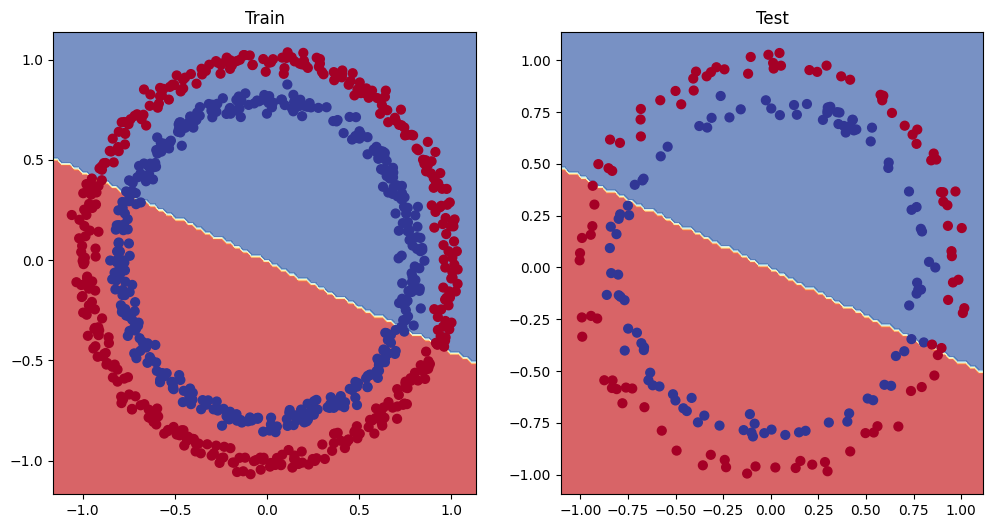

In [34]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # Rows, columns, index
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2) # Rows, columns, index
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving a model

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - 5 to 10
* Fit for longer
* Changing activation function
* Changing learning rate
* Change the loss function

**Hyperparameters** - values ML engineers and data scientists can change

Improve by:
* Add more hidden units: 5-> 10
* Increase number of layers: 2 -> 3
* Increase number of epochs: 100 -> 1000


In [35]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features=10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) #Leverages speed ups

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(
    params = model_1.parameters(),
    lr = 0.1
)

In [37]:
# Training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs
epochs = 1000

# Put data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test  = X_test.to(device), y_test.to(device)

# training and evaluation loop
for epoch in range(epochs):
  # Training
  model_1.train()

  # Forward pass
  y_logits = model_1(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits)) # y_loguts -> y predictions -> y labels

  # 2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_pred)

  # 3. Optimizer zero_grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Loss and Accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

    # Print
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


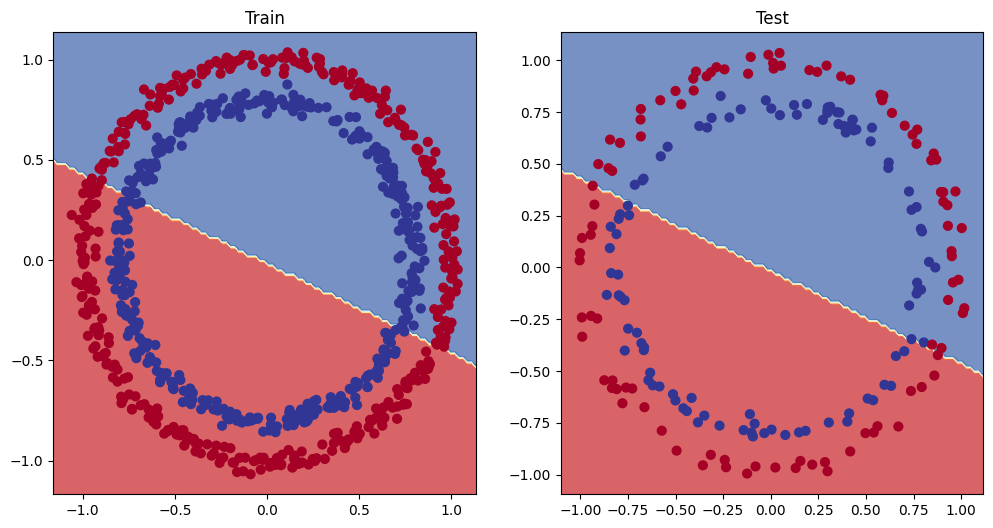

In [38]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # Rows, columns, index
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2) # Rows, columns, index
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if the model can fit a straight line

Test out a smaller problem to troubleshoot a larger problem

In [39]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_reg = torch.arange(start,end, step).unsqueeze(dim = 1)
y_reg = weight * X_reg + bias # Linear regression formula without epsilon

print(len(X_reg), len(y_reg))
X_reg[:5], y_reg[:5]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [40]:
# Create train and test split
train_split = int(0.8 * len(X_reg))
X_train_reg, y_train_reg = X_reg[:train_split], y_reg[:train_split]
X_test_reg, y_test_reg = X_reg[train_split:], y_reg[train_split:]

# Check lengths
len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

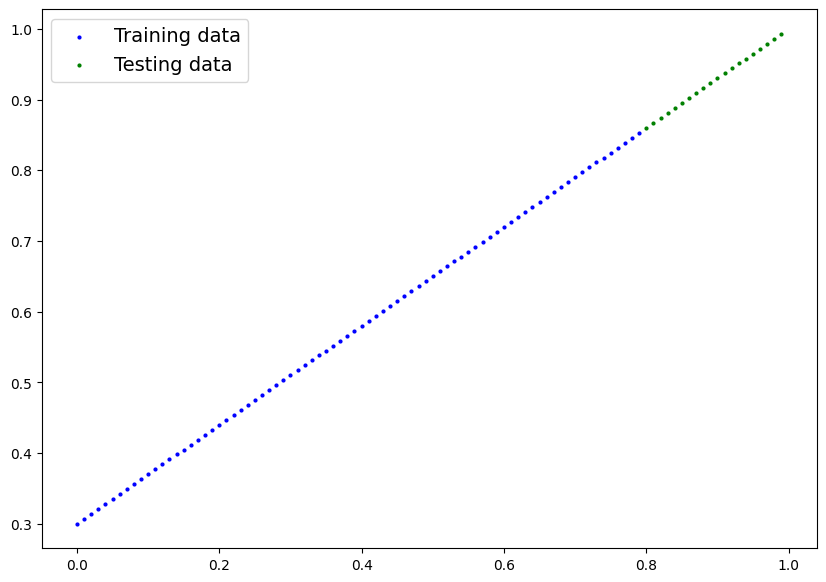

In [41]:
plot_predictions(X_train_reg,
                 y_train_reg,
                 X_test_reg,
                 y_test_reg)

### 5.2 Adjust `model_1` to fit a straight line

In [42]:
# Using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 16),
    nn.Linear(in_features = 16, out_features = 16),
    nn.Linear(in_features = 16, out_features = 1 )
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [43]:
# Loss
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01) # LR - multiplier applied to each parameter each epoch

In [44]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5000

X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_reg)
  loss = loss_fn(y_pred, y_train_reg)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.44708 | Test Loss: 0.69529
Epoch: 100 | Loss: 0.02856 | Test Loss: 0.12693
Epoch: 200 | Loss: 0.03247 | Test Loss: 0.11995
Epoch: 300 | Loss: 0.03045 | Test Loss: 0.11077
Epoch: 400 | Loss: 0.03122 | Test Loss: 0.10569
Epoch: 500 | Loss: 0.03043 | Test Loss: 0.10056
Epoch: 600 | Loss: 0.02855 | Test Loss: 0.09639
Epoch: 700 | Loss: 0.02871 | Test Loss: 0.09587
Epoch: 800 | Loss: 0.02741 | Test Loss: 0.09201
Epoch: 900 | Loss: 0.02492 | Test Loss: 0.08498
Epoch: 1000 | Loss: 0.02596 | Test Loss: 0.08452
Epoch: 1100 | Loss: 0.02411 | Test Loss: 0.08291
Epoch: 1200 | Loss: 0.02459 | Test Loss: 0.07888
Epoch: 1300 | Loss: 0.02320 | Test Loss: 0.07723
Epoch: 1400 | Loss: 0.02362 | Test Loss: 0.07393
Epoch: 1500 | Loss: 0.02186 | Test Loss: 0.07357
Epoch: 1600 | Loss: 0.01988 | Test Loss: 0.06944
Epoch: 1700 | Loss: 0.02036 | Test Loss: 0.07099
Epoch: 1800 | Loss: 0.02122 | Test Loss: 0.06771
Epoch: 1900 | Loss: 0.01829 | Test Loss: 0.06366
Epoch: 2000 | Loss: 0.01894 | Te

In [45]:
# Make predictions
model_2.eval()

with torch.inference_mode():
  y_reg_preds = model_2(X_test_reg)
y_reg_preds

tensor([[0.8593],
        [0.8660],
        [0.8727],
        [0.8794],
        [0.8860],
        [0.8927],
        [0.8994],
        [0.9061],
        [0.9128],
        [0.9195],
        [0.9262],
        [0.9329],
        [0.9396],
        [0.9463],
        [0.9530],
        [0.9596],
        [0.9663],
        [0.9730],
        [0.9797],
        [0.9864]], device='cuda:0')

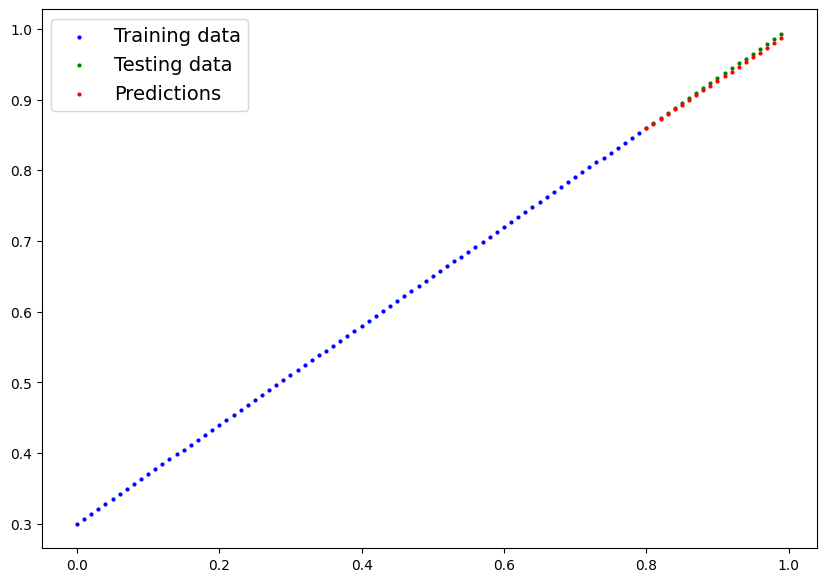

In [46]:
plot_predictions(X_train_reg.cpu(),
                 y_train_reg.cpu(),
                 X_test_reg.cpu(),
                 y_test_reg.cpu(),
                 predictions = y_reg_preds.cpu())

### 6. Non-Linearity

"What patterns could I draw if I was given an infinite amount of straight and non-straight lines?"

In ML terms, an infinite(but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data(red and blue circles)

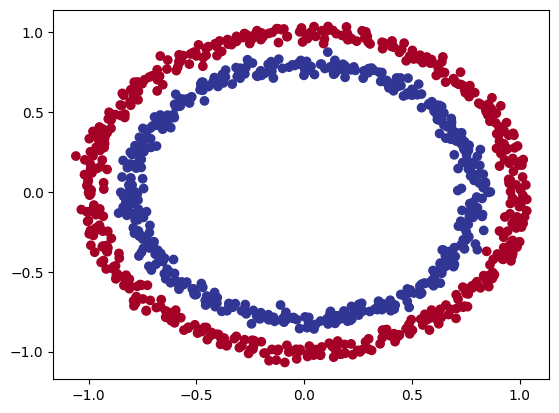

In [47]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state = 42
)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [48]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [49]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-Linear = Not a straight line

Artificial neural networks are a large combination of linear (straight) and non-linear (non-straight) functions which are potentially able to find patterns in data

In [50]:
# Build a model with non-linear
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
    self.layer_2 = nn.Linear(in_features= 16, out_features = 16)
    self.layer_3 = nn.Linear(in_features = 16, out_features = 1)
    self.relu = nn.ReLU() # Non-Linear activation function

  def forward(self, x):
    # No ReLU afte rlayer 3 since I'll pass it to the sigmoid function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [51]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

### Classification problems
1. Spam or not spam email
2. Credit cards => fraud or not fraud
3. Insurance claims => At fault or not at fault (person mentioning the claim at fault or not at fault)


### 6.3 Training a model with non-linearity

In [52]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Loss Backward
  loss.backward()

  # 5. Optimizer Step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss =  loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6975, Acc: 50.00% | Test Loss: 0.6978, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6899, Acc: 56.25% | Test Loss: 0.6914, Test Acc: 51.50%
Epoch: 200 | Loss: 0.6866, Acc: 52.88% | Test Loss: 0.6887, Test Acc: 52.00%
Epoch: 300 | Loss: 0.6826, Acc: 53.62% | Test Loss: 0.6858, Test Acc: 52.50%
Epoch: 400 | Loss: 0.6774, Acc: 54.00% | Test Loss: 0.6819, Test Acc: 53.50%
Epoch: 500 | Loss: 0.6701, Acc: 56.00% | Test Loss: 0.6764, Test Acc: 55.50%
Epoch: 600 | Loss: 0.6594, Acc: 62.38% | Test Loss: 0.6678, Test Acc: 58.00%
Epoch: 700 | Loss: 0.6417, Acc: 75.50% | Test Loss: 0.6533, Test Acc: 68.50%
Epoch: 800 | Loss: 0.6128, Acc: 87.38% | Test Loss: 0.6289, Test Acc: 85.00%
Epoch: 900 | Loss: 0.5640, Acc: 97.25% | Test Loss: 0.5872, Test Acc: 93.00%


In [53]:
model_3.state_dict() # ReLU doesn't have parameters to optimize -> max(0, x) -> Max of -ve input is 0, max of +ve is x

OrderedDict([('layer_1.weight',
              tensor([[ 0.7327,  1.1127],
                      [-0.2863,  1.0241],
                      [-0.1549,  0.1427],
                      [-0.6133,  0.5143],
                      [ 0.8164, -0.9200],
                      [ 0.8385,  0.1679],
                      [ 0.7971,  0.1993],
                      [ 0.5464, -0.1327],
                      [ 0.7627,  0.1660],
                      [-0.4513,  0.2583],
                      [-0.4030, -0.1742],
                      [-0.3097,  0.6591],
                      [-0.9446, -0.3753],
                      [-0.1320, -0.5099],
                      [ 0.0346, -1.0568],
                      [ 0.6519, -0.6539]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 1.2755e-01,  2.0443e-04, -2.2960e-01,  2.6165e-01, -1.4478e-01,
                       9.4407e-01, -7.6385e-02, -2.6171e-01,  1.1627e-02, -1.9016e-01,
                       4.5450e-01,  7.7591e-01,  4.9614e-02, -3.1206e-01

### 6.4 Evaluate a model trained with non-linear activation functions

In [54]:
# Make Predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

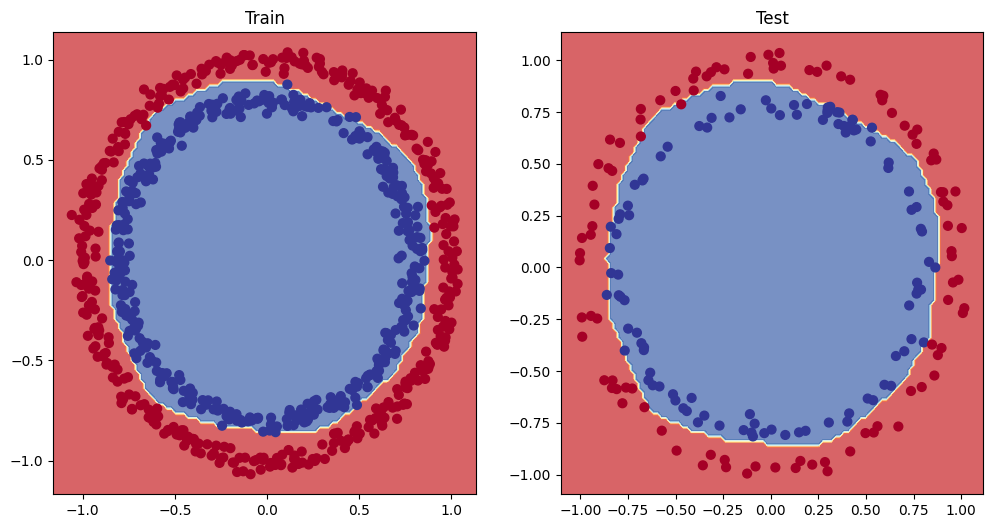

In [55]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

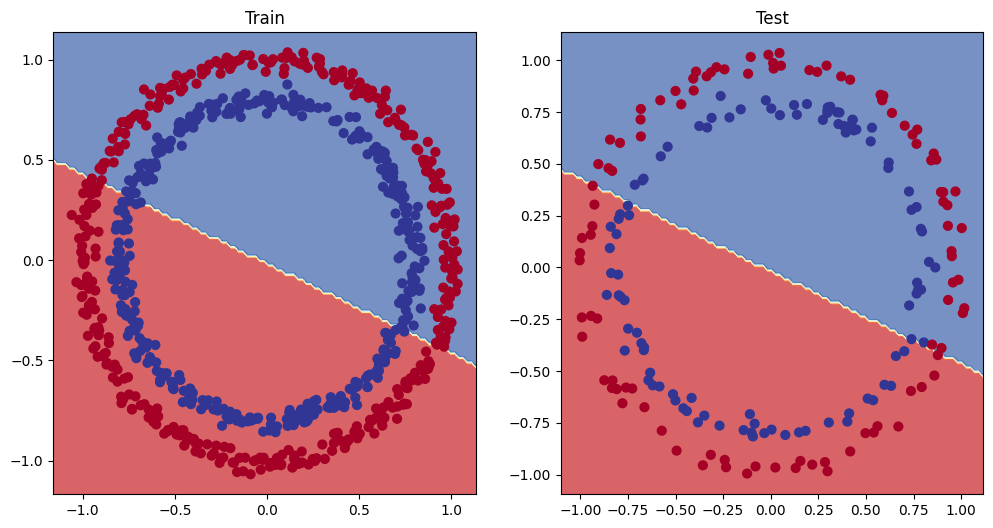

In [56]:
# Plot decision boundaries - Model 1 has no non-linearity
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it tools to discover patterns in data and it tries to figure out the patterns on its own

And the tools are linear and non-linear functions

In [57]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A.dtype

torch.float32

In [58]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

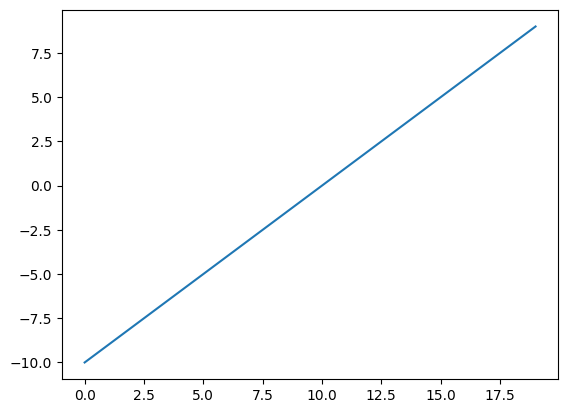

In [59]:
# Visualize the tensor
plt.plot(A)

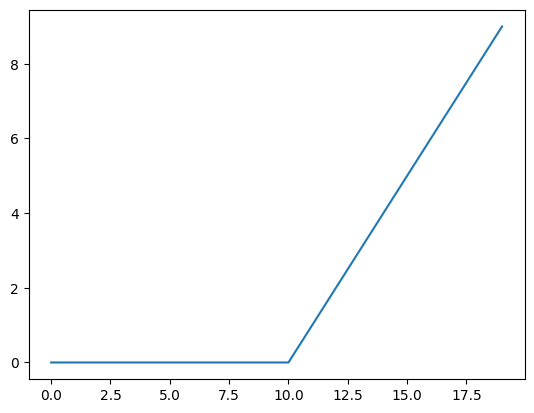

In [60]:
plt.plot(torch.relu(A))

In [61]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

print(A)
print(relu(A))

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


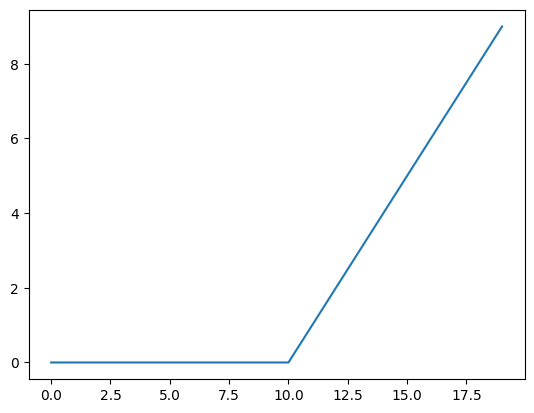

In [62]:
# Plot ReLU activation function
plt.plot(relu(A))

In [63]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

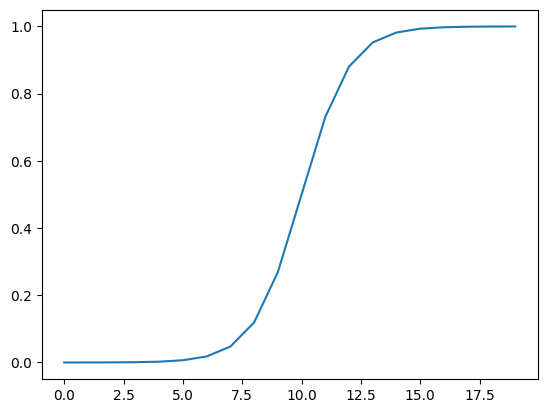

In [64]:
plt.plot(torch.sigmoid(A))

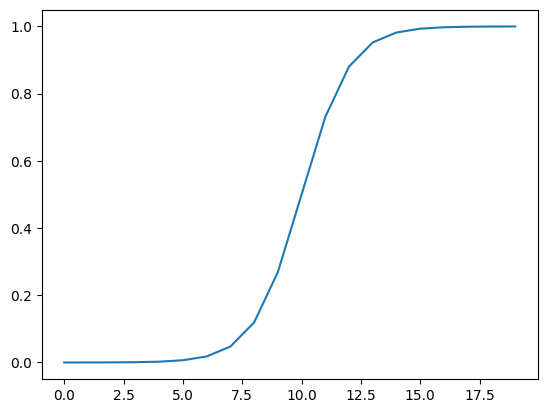

In [65]:
plt.plot(sigmoid(A))

In [66]:
# y coefficient for the sigmoid function based on A
B = torch.tensor([(4.54*10**-5), (1.23 * 10**-4), (3.35*10**-4), (9.11 * 10**-4), (2.47*10**-3), (6.69*10**-3),
                  0.017986, 0.04743, 0.1192, 0.2689, 0.5, 0.731, 0.881, 0.95257, 0.982,
                  0.99331, 0.99753, 0.9991, 0.9997, 0.99988, 0.999953], dtype = torch.float32)

B

tensor([4.5400e-05, 1.2300e-04, 3.3500e-04, 9.1100e-04, 2.4700e-03, 6.6900e-03,
        1.7986e-02, 4.7430e-02, 1.1920e-01, 2.6890e-01, 5.0000e-01, 7.3100e-01,
        8.8100e-01, 9.5257e-01, 9.8200e-01, 9.9331e-01, 9.9753e-01, 9.9910e-01,
        9.9970e-01, 9.9988e-01, 9.9995e-01])

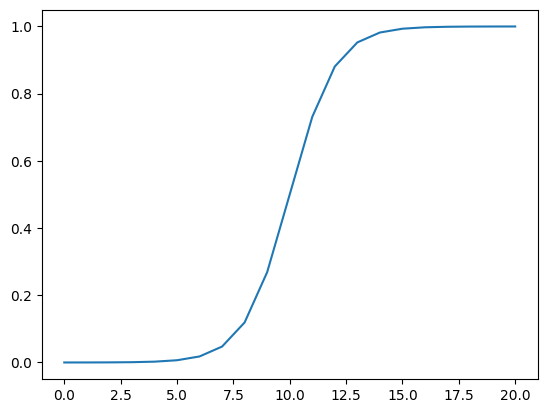

In [67]:
plt.plot(B)

## 8. Putting it all together with a multi-class classification problem

1. Binary Classification
  * Cat vs Dog
  * Spam vs Not Spam
  * Fraud or Not Fraud

2. Multi-class Classification
  * Cat vs Dog vs Chicken etc

3. Differences
  * Multi-class uses:
    - Softmax instead of sigmoid
    - Cross-entropy instead of binary     
    cross entropy

### 8.1 Creating a toy multi-class Dataset

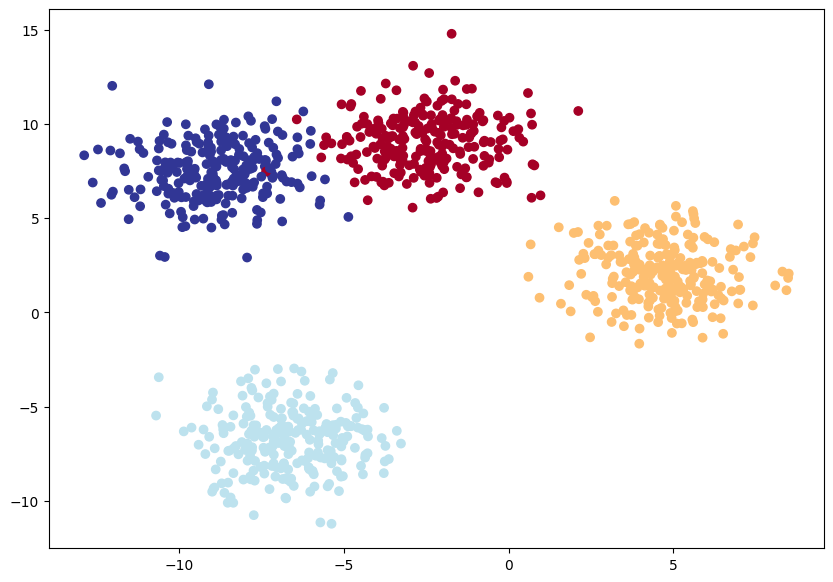

In [68]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation. Capitalized to show that these are changeable settings
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs (n_samples = 1000,
                             n_features=NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5, # Give the clusters a little shake up - If 0, all dots arrange themselves at 1 point - less space between the dots
                             random_state = RANDOM_SEED)

# 2. Turn Data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train,  y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED) # Allows some reproducability

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap = plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in Pytorch

In [69]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [70]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8): # Doc strings
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int) : Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    """
    # The data is linearly separable. Therefore, it could classify even without ReLU. However most data requires some non-linearity applied to it by the model
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
      #nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_features)
    )

  def forward (self, x):
    return self.linear_layer_stack(x) # Use self since linear_layer_stack has been initialized in a constructor

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [71]:
X_blob_train[:5], y_blob_train[5:30]

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175]]),
 tensor([0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1, 3, 2, 3, 0, 1,
         0]))

In [72]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [73]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

### 8.4 Getting prediction probabilities for a multi-class  Pytorch Model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Prediction probabilities (use `torch.softmax`) -> Prediction labels (take the `argmax` of the prediction probabilities)

In [74]:
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-1.2464, -0.8990, -1.4913, -0.5871],
        [ 0.8125, -1.6255,  0.7427,  1.9673],
        [ 0.2863, -0.3251,  0.2584,  0.0986],
        [-0.7877, -0.5911, -0.9520, -0.4658],
        [-0.4386, -1.8562, -0.5667,  1.0392],
        [ 0.9511, -1.8409,  0.8746,  2.3116],
        [ 0.2921, -0.3947,  0.2962,  0.1806],
        [ 0.0616, -1.7666, -0.0540,  1.3365],
        [ 0.2854, -0.3542,  0.2511,  0.1372],
        [-0.0874, -1.7541, -0.1803,  1.2494]], device='cuda:0')

In [75]:
# Convert model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2464, -0.8990, -1.4913, -0.5871],
        [ 0.8125, -1.6255,  0.7427,  1.9673],
        [ 0.2863, -0.3251,  0.2584,  0.0986],
        [-0.7877, -0.5911, -0.9520, -0.4658],
        [-0.4386, -1.8562, -0.5667,  1.0392]], device='cuda:0')
tensor([[0.1949, 0.2758, 0.1525, 0.3768],
        [0.1926, 0.0168, 0.1796, 0.6111],
        [0.2990, 0.1623, 0.2908, 0.2479],
        [0.2250, 0.2738, 0.1909, 0.3104],
        [0.1537, 0.0372, 0.1352, 0.6738]], device='cuda:0')


In [76]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [77]:
torch.max(y_pred_probs[0]) # Out of 1, the model thinks that that index is that class by that amount.

tensor(0.3768, device='cuda:0')

In [78]:
torch.argmax(y_pred_probs[0])

tensor(3, device='cuda:0')

In [79]:
y_blob_test[0]

tensor(1, device='cuda:0')

In [80]:
# Convert our model's probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 0, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0,
        0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3,
        0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0,
        0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3,
        0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3,
        1, 3, 0, 3, 3, 3, 0, 3], device='cuda:0')

In [81]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

### 8.5 Create a training loop and testing loop for a multi-class Pytorch model

In [82]:
# Manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epochs
epochs = 100

# Loop
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  #y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)
  y_pred_prob = torch.argmax(torch.softmax(y_logits, dim = 1), dim = 1)

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred_prob)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_4.eval() # Removes unnecessary functionalities eg dropout layers, batchnorm etc
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred_prob = torch.argmax(torch.softmax(test_logits, dim = 1), dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_pred_prob)

  # Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1822, Acc: 29.50% | Test Loss: 0.9223, Test Acc: 70.00%
Epoch: 10 | Loss: 0.4841, Acc: 96.75% | Test Loss: 0.4869, Test Acc: 97.50%
Epoch: 20 | Loss: 0.3357, Acc: 99.00% | Test Loss: 0.3412, Test Acc: 99.50%
Epoch: 30 | Loss: 0.2576, Acc: 99.00% | Test Loss: 0.2600, Test Acc: 99.50%
Epoch: 40 | Loss: 0.1876, Acc: 99.00% | Test Loss: 0.1823, Test Acc: 99.50%
Epoch: 50 | Loss: 0.1080, Acc: 99.00% | Test Loss: 0.0982, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0649, Acc: 99.12% | Test Loss: 0.0563, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0491, Acc: 99.25% | Test Loss: 0.0408, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0418, Acc: 99.12% | Test Loss: 0.0335, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0377, Acc: 99.12% | Test Loss: 0.0292, Test Acc: 99.50%


### 8.6 Making and Evaluating predictions with a PyTorch multiclass model

In [83]:
# Make Predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  2.9849,   9.1582,  -9.3079, -12.6296],
        [  2.8329,  -8.9875,   2.0465,   8.4220],
        [ -2.0086,  -4.2221,   4.5588,  -0.1115],
        [  0.8716,   6.1868,  -4.9749,  -8.4562],
        [  6.6117,   1.7516,  -8.3380,  -4.8122],
        [  3.1911, -10.7773,   2.4867,  10.1428],
        [ -1.9692,  -3.8132,   4.1783,   0.1711],
        [  5.8630,  -1.0438,  -5.4178,  -0.7326],
        [ -2.4899,  -5.3520,   5.5467,  -0.1460],
        [  6.0587,  -0.2768,  -6.1471,  -2.0405]], device='cuda:0')

In [84]:
# Logits -> Prediction Probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[2.0802e-03, 9.9792e-01, 9.5367e-09, 3.4417e-10],
        [3.7180e-03, 2.7340e-08, 1.6936e-03, 9.9459e-01],
        [1.3903e-03, 1.5198e-04, 9.8919e-01, 9.2685e-03],
        [4.8922e-03, 9.9509e-01, 1.4138e-05, 4.3502e-07],
        [9.9230e-01, 7.6901e-03, 3.1921e-07, 1.0847e-05],
        [9.5565e-04, 8.2012e-10, 4.7248e-04, 9.9857e-01],
        [2.0955e-03, 3.3147e-04, 9.7976e-01, 1.7816e-02],
        [9.9763e-01, 9.9851e-04, 1.2583e-05, 1.3631e-03],
        [3.2220e-04, 1.8413e-05, 9.9630e-01, 3.3579e-03],
        [9.9792e-01, 1.7685e-03, 4.9910e-06, 3.0315e-04]], device='cuda:0')

In [85]:
# Pred Probs -> Pred Labels
## y_pred_probs.argmax()
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [86]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

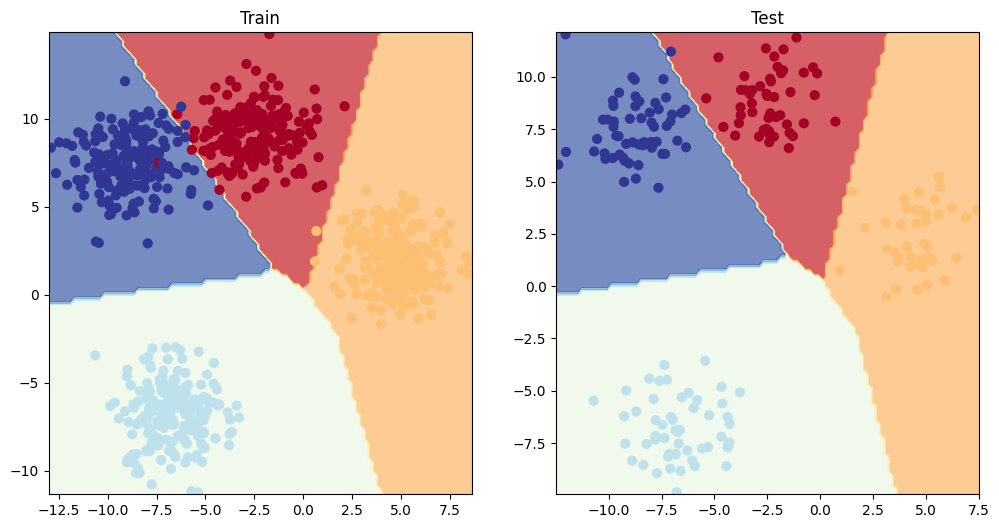

In [87]:
# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


## 9. A few more classification metrics (to evaluate our classification model)
* Accuracy - out of 100%, how many does the model get right - not the best for imbalanced classes
* Precision - leads to less false +ves
* Recall - leads to less false -ves
* F1-score - combines Precision and Recall
* Confusion Matrix
* Classification report

`Visualize + Experiment in ML`

`import torchmetrics`

In [88]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 7.4 MB/s eta 0:00:00


In [93]:
from torchmetrics import Accuracy

# Setup metric - tasks:
# 'binary': for binary classification
# 'multiclass': for multi-class classification
# 'multilabel': for multi-label classification
# Add num_classes
num = 4
torchmetric_accuracy = Accuracy(task = "multiclass", num_classes = num).to(device)

# Calculate accuracy
torchmetric_accuracy(y_pred_probs, y_blob_test)

tensor(0.9950, device='cuda:0')